# Chapter 3: Graphing

In [43]:
import pandas as pd
from os import listdir
from os.path import isfile, join

raw_data_path = '../raw_data/'
logfiles = [f for f in listdir(raw_data_path) if isfile(join(raw_data_path, f))]
print(logfiles)

col_map = {
    'Time (sec)': 'time',
    'A/F Sens 1 Ratio (AFR)': 'afr',
    'AF Sens 1 Ratio (AFR)': 'afr',
    'Boost (PSI)': 'boost',
    'Calculated Load (g/rev)': 'load',
    'Feedback Knock (°)': 'feedback_knock',
    'Fine Knock Learn (°)': 'fine_knock_learn',
    'Gear Position (Gear)': 'gear_position',
    'Ignition Timing (°)': 'timing',
    'MAF (g/s)': 'maf',
    'Primary Ign. (°)': 'primary_timing',
    'RPM (RPM)': 'rpm',
    'TD Burst (%)': 'td_burst',
    'TD Continuous (%)': 'td_continuous',
    'Target Boost (PSI)': 'boost_target',
    'Throttle Pos. (%)': 'throttle',
    'Wastegate Duty (%)': 'wg_duty',
    'Wastegate Max (%)': 'wg_max',
}
dataframes = []

for log in logfiles:
    #print( log )
    # read the logfile
    data = pd.read_csv('../raw_data/{}'.format(log), encoding='iso-8859-1')
    
    #print(data.columns)
    # drop the metadata column:
    data.drop(data.columns[[-1]], axis=1, inplace=True)

    # rename the columns
    data.rename(columns=col_map, inplace=True)
    
    # change delta_t to timestamps
    start_time = pd.Timestamp(log.split('.')[1])
    delta_t = pd.to_timedelta(data['time'], unit='s')
    data['time'] = delta_t + start_time

    # and set the timestamps as the index
    data.index = data.time
    data.drop('time', 1, inplace=True)
                              
    dataframes.append(data)
    
    
# Concatenate all the dataframes together, 
# easier because they are in a list already

data = pd.concat(dataframes)
data.describe()

['roxy_log.201607270830.csv', 'roxy_log.201607210800.csv', 'roxy_log.201607211200.csv', 'roxy_log.201607251200.csv', 'roxy_log.201607251500.csv', 'roxy_log.201607250900.csv', 'roxy_log.201607220800.csv']


,afr,boost,load,feedback_knock,fine_knock_learn,gear_position,timing,maf,primary_timing,rpm,td_burst,td_continuous,boost_target,throttle,wg_duty,wg_max
count,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.00000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000,122771.000000
mean,15.763771,-7.788969,0.447695,-0.001839,-0.045493,3.207142,25.057648,18.257983,25.31573,2138.628129,-0.002819,4.263650,-4.354385,7.744190,10.533924,13.521492
std,3.405033,4.374453,0.371791,0.063418,0.265957,1.870825,11.902890,25.787123,12.54263,1056.117063,0.175675,1.482822,3.738674,14.313448,14.066344,14.840890
min,11.140000,-12.470000,0.030000,-4.220000,-2.460000,1.000000,-13.500000,1.560000,5.31000,0.000000,-6.000000,-5.030000,-9.750000,0.000000,0.000000,0.000000
25%,14.360000,-10.090000,0.270000,0.000000,0.000000,1.000000,11.500000,4.350000,11.99000,941.000000,0.000000,4.210000,-5.410000,0.000000,0.000000,0.000000
50%,14.590000,-8.910000,0.330000,0.000000,0.000000,3.000000,25.500000,10.040000,26.76000,2322.000000,0.000000,5.000000,-5.340000,4.000000,0.000000,4.720000
75%,14.810000,-7.150000,0.520000,0.000000,0.000000,5.000000,37.000000,22.220000,38.36000,2901.000000,0.000000,5.000000,-5.340000,11.000000,25.490000,30.850000
max,25.730000,18.760000,2.940000,0.000000,0.000000,6.000000,43.500000,248.790000,42.58000,6880.000000,5.000000,5.000000,19.840000,100.000000,45.490000,45.680000


In [44]:
%matplotlib inline

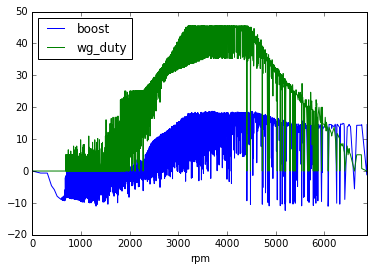

In [45]:
data.groupby('rpm')['boost', 'wg_duty'].max().plot()

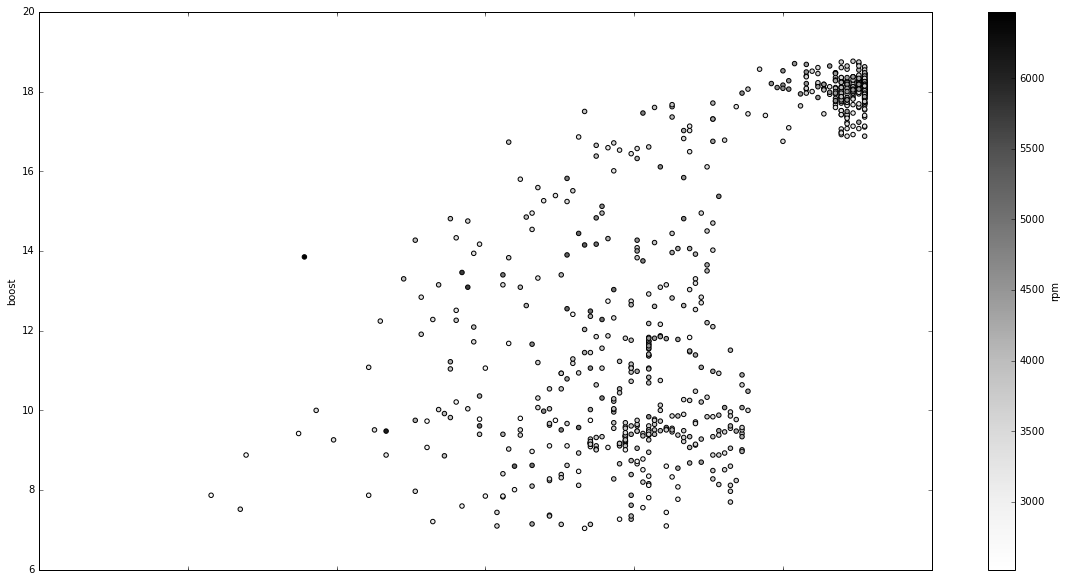

In [48]:
data[(data.boost > data.boost_target)&(data.boost>7)].plot('wg_duty', 'boost', c='rpm', kind='scatter', figsize = (20,10))

## BOKEH!

In [6]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

Loading BokehJS ...

In [58]:
#import numpy as np
#TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"
#p = figure(tools=TOOLS)
p = figure(tools='pan,wheel_zoom,reset')


x = data.rpm[data.boost > 7]
y = data.boost[data.boost > 7]

#colors = ["#%02x%02x%02x".format(int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

p.scatter(
    x,y, 
    #radius=radii, 
    #fill_color=colors, 
    fill_alpha=0.6, 
    line_color=None
)
#p.line(
#    data.groupby('rpm').boost_target.max(),
#    line_color='red'
#)


In [59]:
data.groupby('rpm').boost_target.max().head()

rpm
0     -5.41
170   -5.41
308   -5.41
394   -5.41
451   -5.41
Name: boost_target, dtype: float64

In [60]:
show(p)

In [29]:
from bokeh.models import ColumnDataSource

#colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
#colors = [colormap[x] for x in flowers['species']]
palette = ["#053061", "#2166ac", "#4393c3", "#92c5de", "#d1e5f0",
           "#f7f7f7", "#fddbc7", "#f4a582", "#d6604d", "#b2182b", "#67001f"]

fbk = data
fbk.index = fbk.rpm
fbk = fbk[fbk.feedback_knock < 0]
low = 0
high= abs(min(fbk.feedback_knock))*100
fbk_inds = [int(10*(x)/(high)) for x in fbk.feedback_knock] #gives items in colors a value from 0-10
colors = [palette[i] for i in fbk_inds]

print( fbk.head() )
source = ColumnDataSource(fbk)

p = figure(title = "knock events")
p.xaxis.axis_label = 'rpm'
p.yaxis.axis_label = 'load'

p.circle(
    "rpm", 
    "load",
    source=source,
    color=colors,
    fill_alpha=0.2, 
    size=10
)


        afr  boost  load  feedback_knock  fine_knock_learn  gear_position  \
rpm                                                                         
3692  11.25   6.77  1.66           -2.11              0.00              4   
3712  11.25   7.64  1.74           -2.11              0.00              4   
3716  11.25   8.37  1.81           -2.11             -1.05              4   
3733  11.25   9.01  1.86           -2.11             -1.05              4   
3746  11.25   9.57  1.89           -2.11             -1.05              6   

      timing     maf  primary_timing   rpm  td_burst  td_continuous  \
rpm                                                                   
3692    15.5  107.98           11.64  3692       0.0           3.41   
3712    14.5  113.28           10.94  3712       0.0           1.84   
3716    13.0  117.07           10.23  3716       0.0           1.04   
3733    13.0  120.00           10.23  3733       0.0           0.00   
3746    13.0  120.63           10.

In [30]:
show(p)